In [1]:
from zigzag.classes.stages import *
from stream.classes.stages import *
from stream.visualization.schedule import (
    plot_timeline_brokenaxes,
)
from stream.visualization.memory_usage import plot_memory_usage
from stream.inputs.examples.hardware.cores.TPU_like import get_core as get_tpu_core
from stream.inputs.examples.hardware.cores.offchip import get_offchip_core
from stream.inputs.examples.hardware.nocs.mesh_2d import get_2d_mesh
from zigzag.classes.hardware.architecture.accelerator import Accelerator
from zigzag.classes.stages import Stage
from stream.classes.workload.computation_node import ComputationNode
from stream.classes.workload.simd_node import SimdNode
from stream.classes.workload.elementwise_node import ElementwiseNode
from stream.classes.workload.flatten_node import FlattenNode
from stream.classes.workload.dummy_node import DummyNode
from stream.classes.stages import UserDefinedModelParserStage
import pickle
from cyclic_scheduling_fitness_evaluator.stream_compatibility_layer import CyclicFitnessEvaluatorBuilder, MinimumLatency, MinimumMemory

# FSRCNN

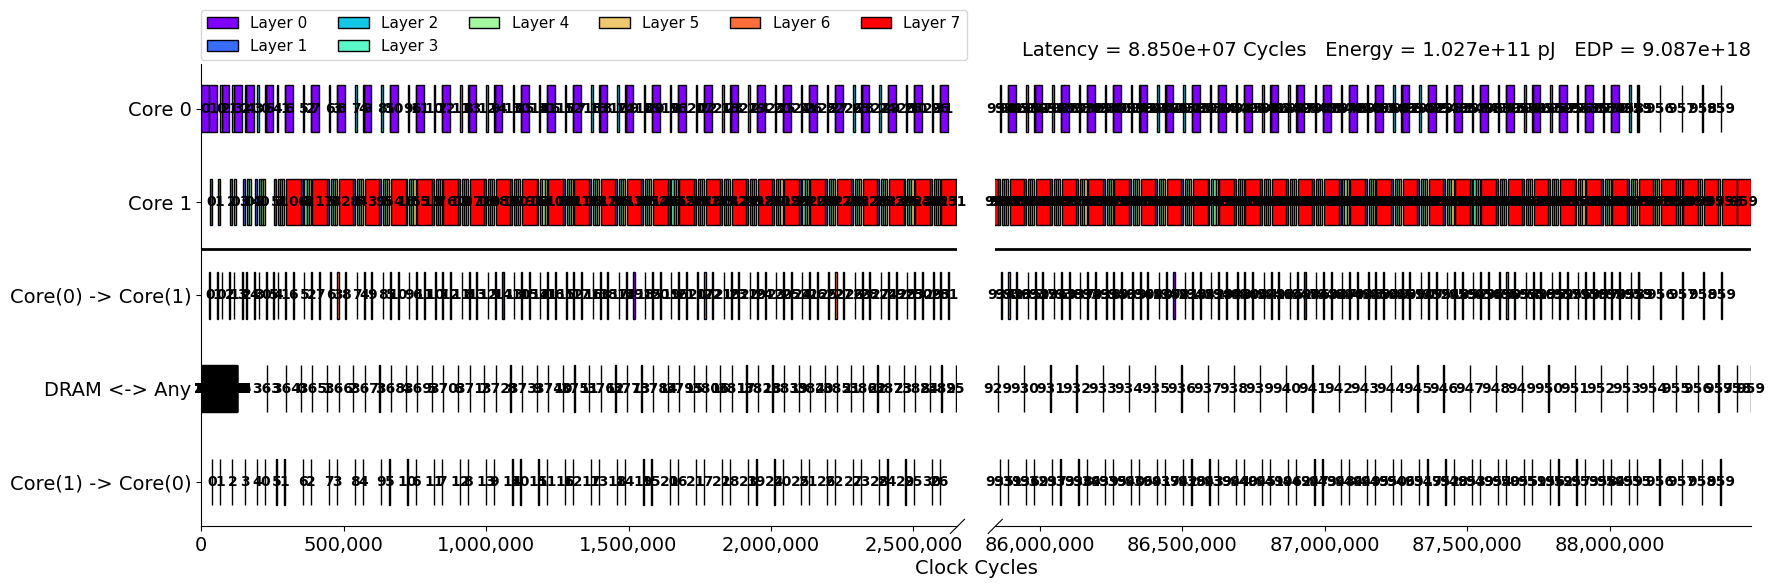

Saved memory usage fig to /tmp/memory


<Figure size 640x480 with 0 Axes>

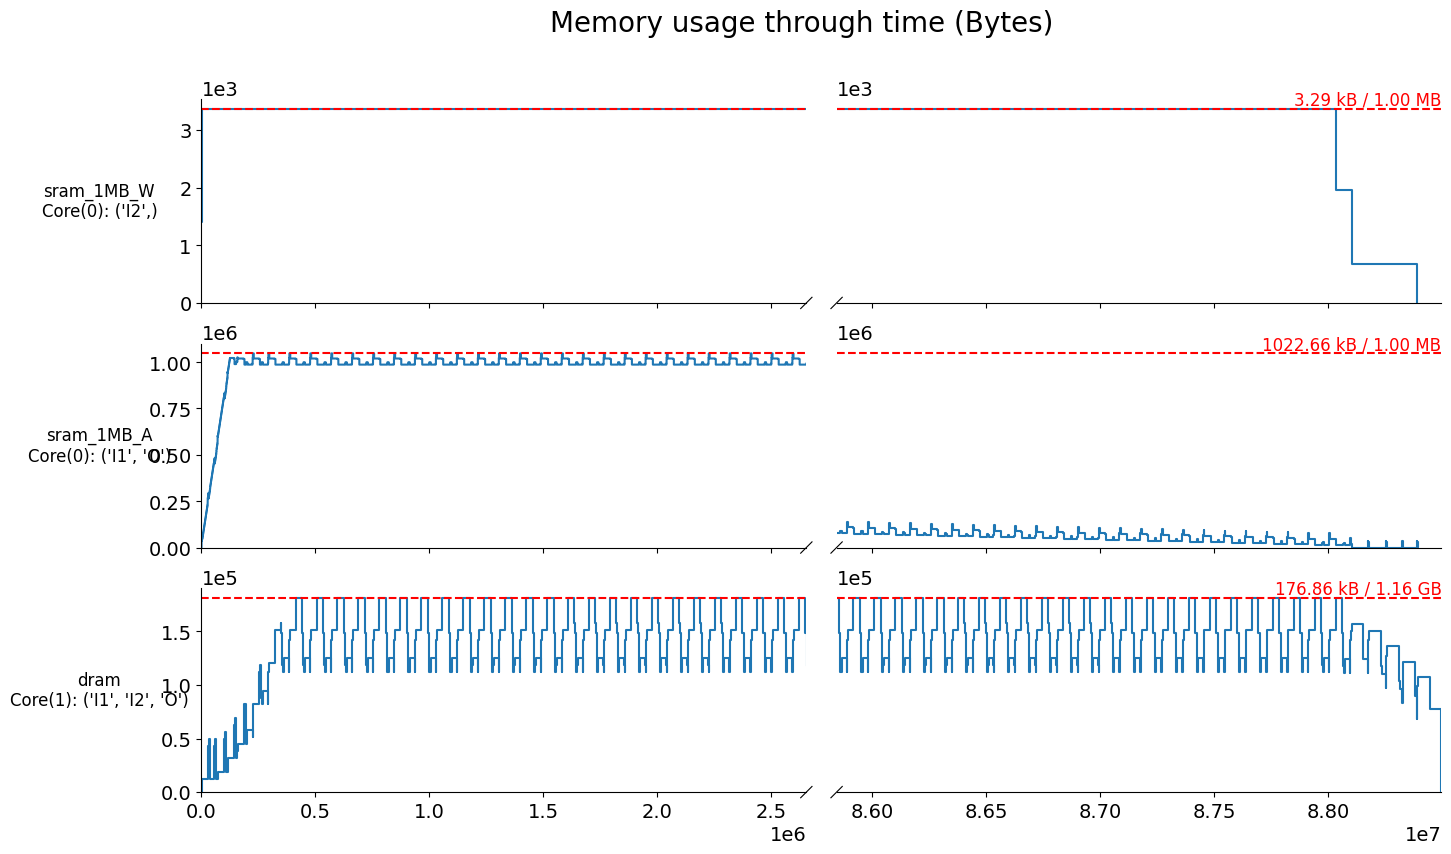

In [2]:
#import logging as _logging

#_logging_level = _logging.INFO
#_logging_format = (
#    "%(asctime)s - %(name)s.%(funcName)s +%(lineno)s - %(levelname)s - %(message)s"
#)
#_logging.basicConfig(level=_logging_level, format=_logging_format)


mainstage = MainStage(
    [  # Initializes the MainStage as entry point
        AcceleratorParserStage,  # Parses the accelerator
        StreamONNXModelParserStage,  # Parses the ONNX Model into the workload
        GenerateCNWorkloadHybridStage,
        IntraCoreMappingStage,
        InterCoreMappingStage,
    ],
    accelerator="architecture.eyeriss_tpu",  # required by AcceleratorParserStage
    workload_path="./problems/fsrcnn.onnx",  # required by ModelParserStage
    mapping_path="mapping.super_resolution_mapping",
    cn_define_mode=1,
    hint_loops=[("OX", "all")],
    loma_lpf_limit=2,
    nb_ga_generations = 1,
    nb_ga_individuals = 2,
    plot_hof=True,
    plot_file_name='plot.png',
    operands_to_prefetch = [],
)

[(scme, _), *_] = mainstage.run()

plot_timeline_brokenaxes(
    scme,
    False,
    section_start_percent=(0,97),
    percent_shown=(3,3),
    plot_data_transfer=True,
    fig_path="/tmp/timeline",
)

plot_memory_usage(scme, (0,97), (3,3), fig_path="/tmp/memory")

# MCCNN

gen	nevals	avg (energy, latency)   	std (energy, latency)   	min (energy, latency)   	max (energy, latency)   
0  	10    	['2.26e+11', '2.17e+08']	['1.24e+11', '1.01e+08']	['1.95e+10', '5.16e+07']	['3.40e+11', '3.21e+08']
1  	10    	['8.17e+10', '1.00e+08']	['7.62e+10', '6.04e+07']	['1.95e+10', '5.16e+07']	['1.76e+11', '1.88e+08']
2  	10    	['1.95e+10', '5.16e+07']	['0.00e+00', '0.00e+00']	['1.95e+10', '5.16e+07']	['1.95e+10', '5.16e+07']
3  	10    	['1.95e+10', '5.16e+07']	['0.00e+00', '0.00e+00']	['1.95e+10', '5.16e+07']	['1.95e+10', '5.16e+07']
4  	10    	['1.57e+10', '5.49e+07']	['4.60e+09', '4.11e+06']	['1.01e+10', '5.16e+07']	['1.95e+10', '5.99e+07']
5  	10    	['1.57e+10', '5.49e+07']	['4.60e+09', '4.11e+06']	['1.01e+10', '5.16e+07']	['1.95e+10', '5.99e+07']
6  	10    	['1.57e+10', '5.49e+07']	['4.60e+09', '4.11e+06']	['1.01e+10', '5.16e+07']	['1.95e+10', '5.99e+07']
7  	10    	['1.57e+10', '5.49e+07']	['4.60e+09', '4.11e+06']	['1.01e+10', '5.16e+07']	['1.95e+10', '5.99e+07']
8

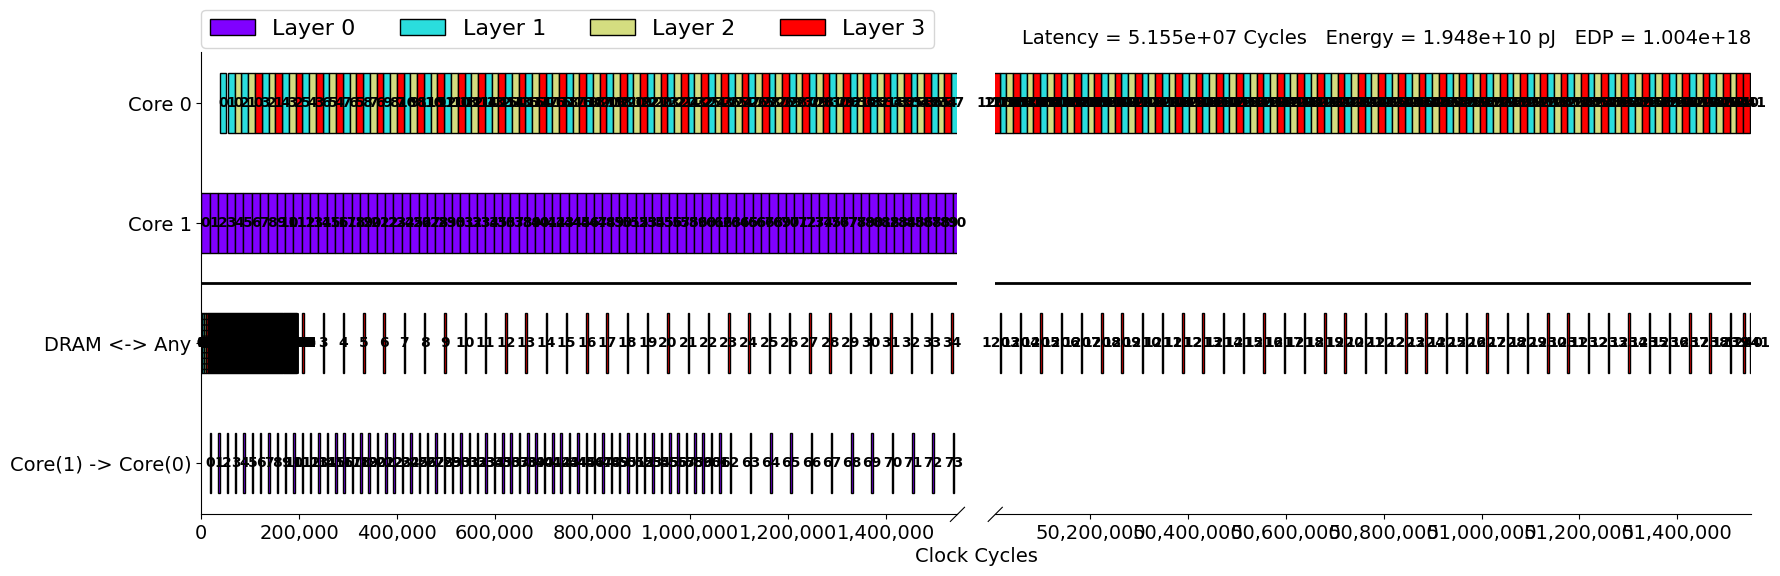

Saved memory usage fig to /tmp/memory


<Figure size 640x480 with 0 Axes>

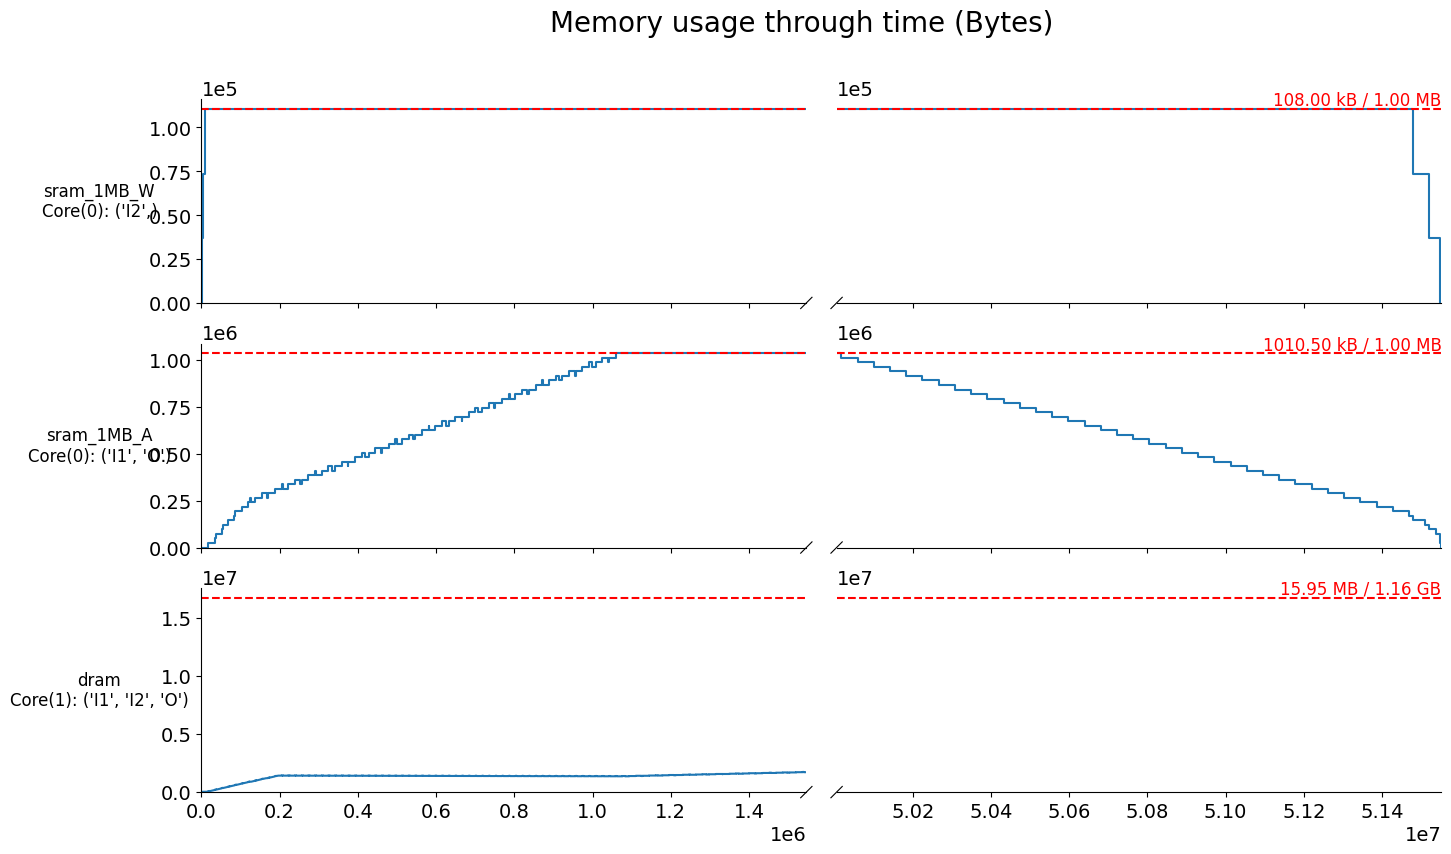

In [2]:
from datetime import datetime

mainstage = MainStage(
    [  # Initializes the MainStage as entry point
        AcceleratorParserStage,  # Parses the accelerator
        UserDefinedModelParserStage,  # Parses the ONNX Model into the workload
        GenerateCNWorkloadHybridStage,
        IntraCoreMappingStage,
        InterCoreMappingStage,
    ],
    accelerator="architecture.eyeriss_tpu",  # required by AcceleratorParserStage
    workload_path="problems.mccnn",  # required by ModelParserStage
    mapping_path="mapping.mccnn_mapping",
    cn_define_mode=1,
    hint_loops=[("OY", "all")],
    loma_lpf_limit=6,
    nb_ga_generations = 10,
    nb_ga_individuals = 10,
    plot_hof=True,
    plot_file_name='plot.png',
    operands_to_prefetch = [],
)

now = datetime.now()
[(scme, _), *_] = mainstage.run()
delta = datetime.now() - now
print(f"Analysis time {delta.total_seconds()}")

plot_timeline_brokenaxes(
    scme,
    False,
    section_start_percent=(0,97),
    percent_shown=(3,3),
    plot_data_transfer=True,
    fig_path="/tmp/timeline",
)

plot_memory_usage(scme, (0,97), (3,3), fig_path="/tmp/memory")